In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
housing = pd.read_csv(r"C:\Users\untry\Downloads\housing_task.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(housing.info())
print(housing['furnishingstatus'].unique())
print(housing.columns)
print(housing['mainroad'].unique())
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
['furnished' 'semi-furnished' 'unfurnished']
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for label in binary_columns:
    housing[label] = housing[label].map({'yes': 1, 'no': 0}).astype(int)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
pd.get_dummies(data=housing, columns=['furnishingstatus']).head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [6]:
correlation_matrix = pd.get_dummies(data=housing, columns=['furnishingstatus']).corr()

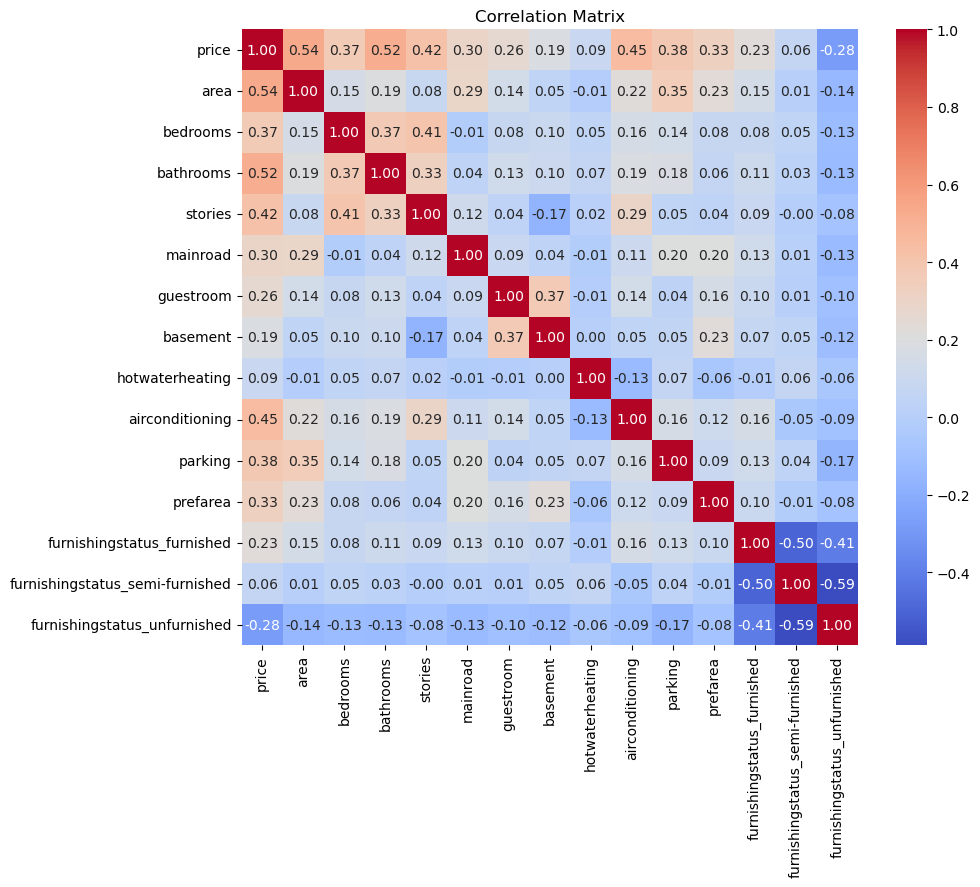

In [7]:
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

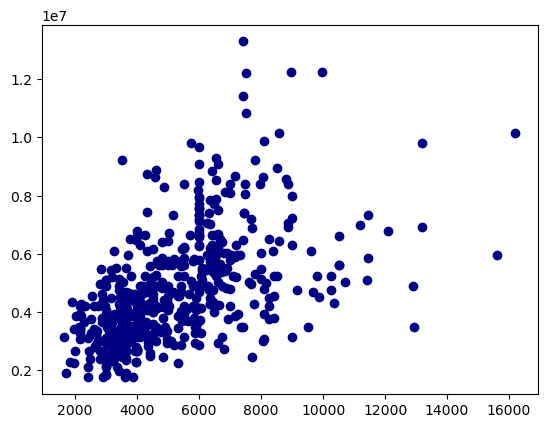

In [8]:
plt.scatter('area','price',data=housing,c='navy')

In [9]:
X = housing['area'].to_numpy().reshape(-1,1)
y = housing['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
score = model.score(X_train_scaled,y_train)
print(f'Mean error: {rmse:3.3} ({rmse/np.mean(y_pred)*100:3.3}%)')
print("R² score:", r2)
print('Model determination: ', score)

Mean error: 1.41e+06 (29.6%)
R² score: 0.3067292122216637
Model determination:  0.28301269798429596


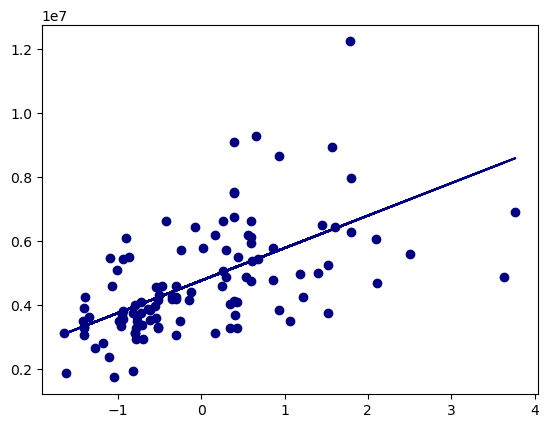

In [14]:
plt.scatter(X_test_scaled,y_test,c='navy')
plt.plot(X_test_scaled,y_pred,c='navy')

**Polynomial Regression**

In [15]:
pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
pipeline.fit(X_train_scaled,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [16]:
y_pred = pipeline.predict(X_test_scaled)

In [17]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
score = model.score(X_train_scaled,y_train)
print(f'Root mean error: {rmse:3.3} ({rmse/np.mean(y_pred)*100:3.3}%)')
print("R² score:", r2)
print('Model determination: ', score)

Root mean error: 1.37e+06 (28.8%)
R² score: 0.34825375514998225
Model determination:  0.28301269798429596


**Multivariate Linear Regression**

In [18]:
high_correl_features = ['area', 'bathrooms', 'airconditioning']

In [19]:
X = housing[high_correl_features]
y = housing['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
score = model.score(X_train_scaled,y_train)
print(f'Root mean error: {rmse:3.3} ({rmse/np.mean(y_pred)*100:3.3}%)')
print("R² score:", r2)
print('Model determination: ', score)

Root mean error: 1.06e+06 (22.3%)
R² score: 0.6066413834229607
Model determination:  0.5313963052472477


**Multivariate Polynomial Regression**

In [25]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [26]:
y_pred = pipeline.predict(X_test_scaled)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
score = model.score(X_train_scaled,y_train)
print(f'Root mean error: {rmse:3.3} ({rmse/np.mean(y_pred)*100:3.3}%)')
print("R² score:", r2)
print('Model determination: ', score)

Root mean error: 1.1e+06 (23.0%)
R² score: 0.5824052295931477
Model determination:  0.5313963052472477


**Trying Regularization Techniques**

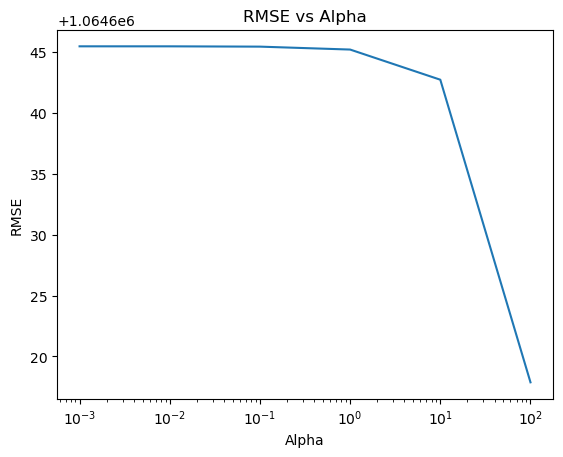

[1064645.481209021, 1064645.4802533973, 1064645.4554726633, 1064645.2155992012, 1064642.7376401254, 1064617.8735448995]


In [28]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
rmse_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled)))
    rmse_scores.append(rmse)

plt.plot(alphas, rmse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.show()
print(rmse_scores)

In [29]:
lasso_reg = Lasso(alpha=100)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=100)

In [30]:
y_pred = lasso_reg.predict(X_test_scaled)

In [31]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
score = lasso_reg.score(X_train_scaled,y_train)
print(f'Root mean error: {rmse:3.3} ({rmse/np.mean(y_pred)*100:3.3}%)')
print("R² score:", r2)
print('Model determination: ', score)

Root mean error: 1.06e+06 (22.3%)
R² score: 0.6066617839001531
Model determination:  0.5313962992882035


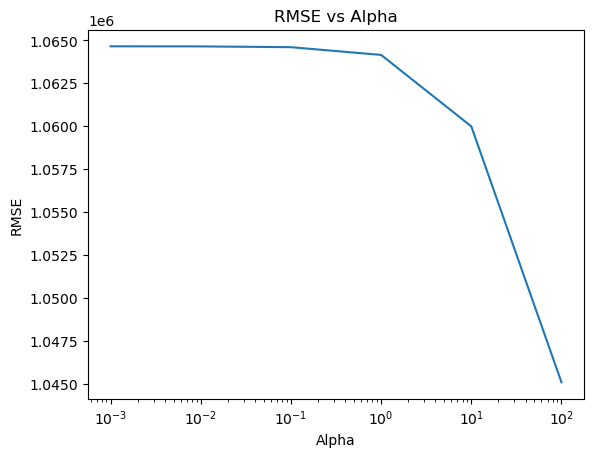

[1064644.976421808, 1064640.4321851176, 1064595.0256642203, 1064144.5351560023, 1059987.3866678337, 1045094.6542155084]


In [32]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
rmse_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled)))
    rmse_scores.append(rmse)

plt.plot(alphas, rmse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.show()
print(rmse_scores)

In [33]:
ridge_reg = Ridge(alpha=100)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [34]:
y_pred = ridge_reg.predict(X_test_scaled)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
score = ridge_reg.score(X_train_scaled,y_train)
print(f'Root mean error: {rmse:3.3} ({rmse/np.mean(y_pred)*100:3.3}%)')
print("R² score:", r2)
print('Model determination: ', score)

Root mean error: 1.05e+06 (21.9%)
R² score: 0.6209557699070336
Model determination:  0.5204424007628548
